# 4-1

## 線形探索

データを先頭から一つずつ調べる


In [5]:
data = [57, 48, 46, 52, 45, 59, 61, 60, 49, 71]
n = len(data)
key = 71
flg = False
for i in range(n):
    if data[i] == key:
        print("data[{}] is {}.".format(i, key))
        flg = True
        break
if flg == False:
    print(str(key) + " is not found.")

data[9] is 71.


In [9]:
data = [57, 48, 46, 52, 45, 59, 61, 60, 49, 71]
n = len(data)
key = 80
i = 0
while i < n and data[i] != key:
    i += 1
if i == n:
    print(str(key) + " is not found.")
else:
    print("data[{}] is {}.".format(i, key))

80 is not found.


In [11]:
data = [
    ["佐藤", "000-0000-0000"],
    ["鈴木", "111-1111-1111"],
    ["高橋", "222-2222-2222"],
    ["田中", "333-3333-3333"],
]

n = len(data)
s = input("検索したい苗字を入力してください：")
i = 0
while i < n and data[i][0] != s:
    i += 1
if i == n:
    print(s + "さんは見つかりませんでした。")
else:
    print(s + "さんの電話番号は" + data[i][1] + "です。")

高橋さんの電話番号は222-2222-2222です。


# 4-2

## 二分探索(バイナリサーチ)

探索するデータを半分に分けてそのどちらに目的の値があるかを判断し、探索は二を絞り込みながら値を探す方法


In [ ]:
data = [
    1,
    2,
    9,
    12,
    20,
    25,
    32,
    48,
    50,
    57,
    72,
    78,
    80,
    93,
    100,
]  # 昇順にソートされていること
try:
    key = int(input("検索する値を入力してください："))
except:
    print("整数を入力してください。")
    key = None

if key is not None:
    left = 0
    right = len(data) - 1
    flg = False

    while left <= right:
        mid = (left + right) // 2
        print("L={},M={},R={}".format(left, mid, right))
        if data[mid] == key:
            print("data[{}] is {}.".format(mid, key))
            flg = True
            break
        if data[mid] < key:
            left = mid + 1
        else:
            right = mid - 1

    if flg == False:
        print(str(key) + "は見つかりませんでした。")

L=0,M=7,R=14
L=8,M=11,R=14
L=12,M=13,R=14
data[13] is 93.


# 4-3

## 木探索


### 二分探索木

すべてのノードの値が左の子や孫＜親＜右の子や孫の関係


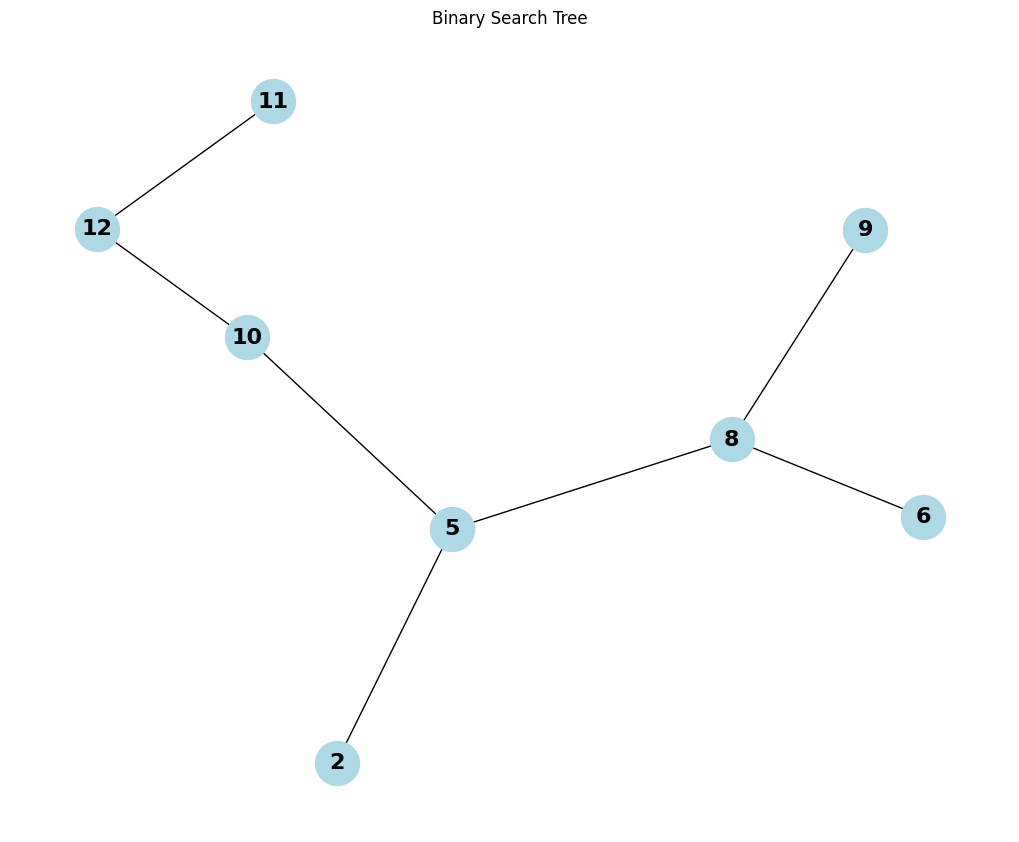

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
binary_tree = nx.Graph()

# Add nodes
binary_tree.add_node(10)  # root
# Left subtree
binary_tree.add_node(5)
binary_tree.add_node(2)
binary_tree.add_node(8)
binary_tree.add_node(6)
binary_tree.add_node(9)
# Right subtree
binary_tree.add_node(12)
binary_tree.add_node(11)

# Add edges to create proper BST structure
# Root connections
binary_tree.add_edge(10, 5)  # root -> left child
binary_tree.add_edge(10, 12)  # root -> right child

# Left subtree connections
binary_tree.add_edge(5, 2)  # 5 -> left child
binary_tree.add_edge(5, 8)  # 5 -> right child
binary_tree.add_edge(8, 6)  # 8 -> left child
binary_tree.add_edge(8, 9)  # 8 -> right child

# Right subtree connections
binary_tree.add_edge(12, 11)  # 12 -> left child

# Improve the layout to look more like a tree
pos = nx.spring_layout(binary_tree, k=1, iterations=50)

# Draw the tree
plt.figure(figsize=(10, 8))
nx.draw(
    binary_tree,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=1000,
    font_size=16,
    font_weight="bold",
)
plt.title("Binary Search Tree")
plt.show()

### 深さ優先探索

下に進めるだけ進み葉に達したら、親に戻って、また別の下に進めるところまで進む

### 幅優先探索

各層を左から右にたどる（根からの深さが同じところを指す）

### 行きがけ順

根を調べてから、左の子、右の子を順に調べる

### 通りがけ順

左の子を調べ、根を調べ、右の子を調べる

### 帰りがけ順

左の子、右の子、根の順に調べる


In [ ]:
LEFT = 0
RIGHT = 1
DATA = 2
node = [
    [1, 2, 10],
    [3, 4, 5],
    [5, None, 12],
    [None, None, 2],
    [6, 7, 8],
    [None, None, 11],
    [None, None, 6],
    [None, None, 9],
]


def traverse(p):  # 意味がわからない
    if p is not None:
        traverse(node[p][LEFT])  ## Noneになるまでこの処理を繰り返す
        print(node[p][DATA])  # つまり最初に個々の処理を通るのはpが３の時
        traverse(node[p][RIGHT])

In [32]:
print("二分探索木を通りがけ順に巡回")
traverse(0)

二分探索木を通りがけ順に巡回
2
5
6
8
9
10
11
12


# 4-4

## 計算量


- **線形探索** →O(n)
- データ量が増えても一定の計算回数で答えが求まるもの →O(1)
  ex. (1+n)\*n/2
- 以下の二重ループ →O(n^2)

```
for i in range(n):
  for j in range(n):
    #...
```

- n 回のループをもう一つ入れ子すると →O(n^3)
  多重ループの計算量の計算には注意
- **二分探索**→O(log2 N)

### 計算量の大小関係

O(1) < O(logn) < O(n) < O(nlogn) < O(n^2) < O(n^3) O(2^n) < O(n!)


# 4-1

a.二分探索のプログラムを実行するとデータが小さな値から出力される →×<br>
b.二分探索を行うデータは、昇順、あるいは降順に並んでいる必要がある →○<br>
c.二分探索を行うデータは二分木の構造になっている必要がある →×<br>
d.二分探索ではデータ量が二倍になると計算量は四倍になる →×<br>
e.人探索ハブ線形探索よりも、常に高速に目的の値を見つけ出すことができる →×


# 4-2

c


# 4-3

d


# 4-4

d


# Extra Lesson 4-1


In [2]:
import matplotlib.pyplot as plt

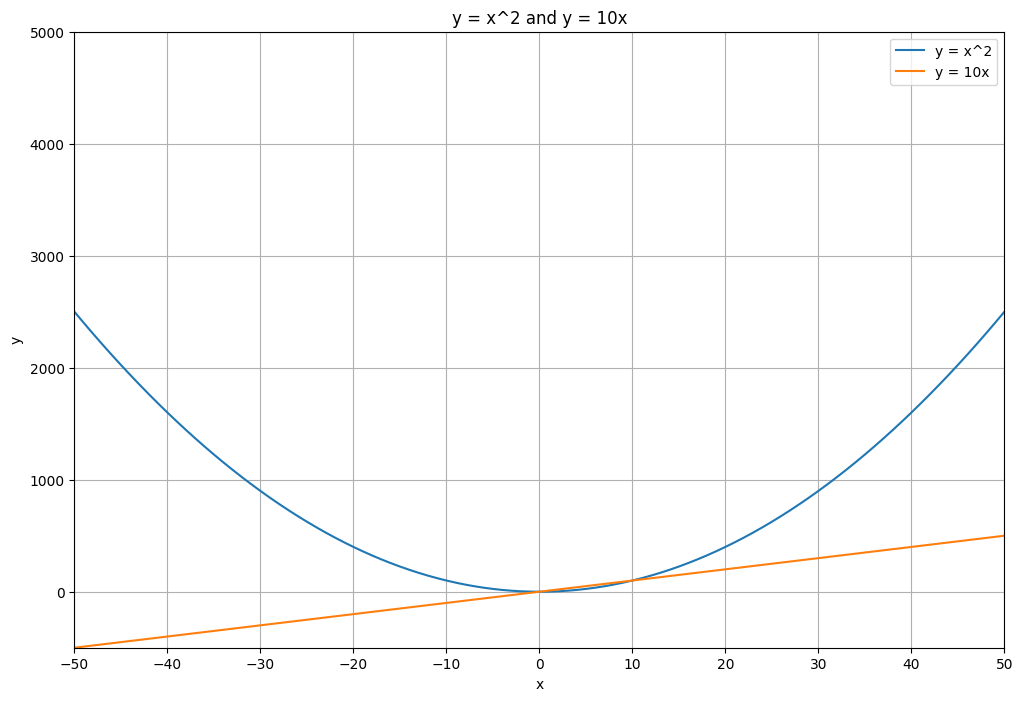

In [42]:
x = [x for x in range(-100, 101)]
y = [x**2 for x in range(-100, 101)]
y2 = [10 * x for x in range(-100, 101)]

plt.figure(figsize=(12, 8))  # グラフのサイズを指定
plt.plot(x, y, label="y = x^2")  # y = x^2のグラフを描画
plt.plot(x, y2, label="y = 10x")  # y = 10xのグラフを描画
plt.legend()  # 凡例を表示
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = x^2 and y = 10x")
plt.xticks(range(-100, 101, 10))  # x軸を10ごとに表記
plt.grid(True)
plt.xlim(-50, 50)  # x軸の表示範囲を拡大
plt.ylim(-500, 5000)  # y軸の表示範囲を拡大
plt.show()

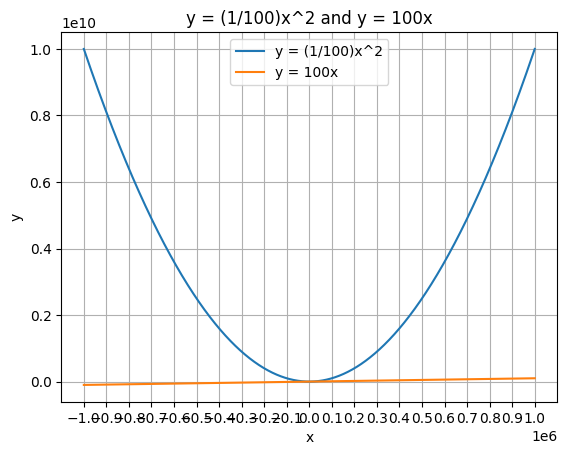

In [5]:
xs = [x for x in range(-1000000, 1000001)]
ys = [(1 / 100) * x**2 for x in range(-1000000, 1000001)]
ys2 = [100 * x for x in range(-1000000, 1000001)]

plt.plot(xs, ys, label="y = (1/100)x^2")
plt.plot(xs, ys2, label="y = 100x")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = (1/100)x^2 and y = 100x")
plt.xticks(range(-1000000, 1000001, 100000))
plt.grid(True)

plt.show()

データの数がとても大きい時、一番大きい計算量のみに注目し、他の計算量や係数を無視できる<br>
ex. 数がとても大きい時 y=x^2+10x+5 の計算量は O(n^2)とみなすことができる


# Extra Lesson 4-2


In [6]:
import random

In [9]:
n = 0
r = random.randint(1, 100)
print("1から100の数をあててください")
while True:
    try:
        a = int(input("数を入力してください："))
    except:
        print("整数を入力してください。")
        continue
    n += 1
    if r == a:
        print(str(n) + "回で正解です。")
        break
    if r > a:
        print("もっと大きいです。")
    else:
        print("もっと小さいです。")

1から100の数をあててください
もっと小さいです。
もっと大きいです。
もっと大きいです。
もっと小さいです。
もっと大きいです。
もっと小さいです。
もっと小さいです。
もっと小さいです。
9回で正解です。


# Extra Lesson 4-3


In [12]:
a = 0b10101001
b = 0b10001100
print("AND", bin(a & b))
print("OR", bin(a | b))
print("XOR", bin(a ^ b))
print("~0", ~0)
print("~1", ~1)
print("~-1", ~-1)
print("~-2", ~-2)
print("0b10101001<<1", bin(a << 1))
print("0b10001100>>2", bin(b >> 1))

AND 0b10001000
OR 0b10101101
XOR 0b100101
~0 -1
~1 -2
~-1 0
~-2 1
0b10101001<<1 0b101010010
0b10001100>>2 0b1000110


In [ ]:
f